In [0]:
#Fonte: https://dados.gov.br/dataset/painel-de-produtores-de-derivados-producao-de-biocombustiveis
etanol_tancagem_path = '/FileStore/tables/etanol/landing/etanol_tancagem.csv'

In [0]:
from pyspark.sql.types import *

schema_etanol_tancagem= StructType([
    StructField("mes_ano", StringType(), False),
    StructField("razao_social", StringType(), False),
    StructField("cnpj", StringType(), False),
    StructField("cidade", StringType(), False),
    StructField("estado", StringType(), False),
    StructField("regiao", StringType(), False),
    StructField("tancagem_hidratado", StringType(), False),
    StructField("tancagem_anidro", StringType(), False),
    StructField("tancagem_outros", StringType(), False),
])
etanol_tancagem_1 = spark.read.schema(schema_etanol_tancagem).csv(etanol_tancagem_path, header=True)
etanol_tancagem_1.show()

+-------+--------------------+--------------+--------------------+------------------+------------+------------------+---------------+---------------+
|mes_ano|        razao_social|          cnpj|              cidade|            estado|      regiao|tancagem_hidratado|tancagem_anidro|tancagem_outros|
+-------+--------------------+--------------+--------------------+------------------+------------+------------------+---------------+---------------+
|01/2019|ABENGOA BIOENERGI...|06252818003446|        PIRASSUNUNGA|         São Paulo|     SUDESTE|             56000|           null|           null|
|01/2019|ABENGOA BIOENERGI...|06252818003799|SAO JOAO DA BOA V...|         São Paulo|     SUDESTE|             22189|           null|           null|
|01/2019|ACUCAR E ALCOOL B...|75619056000128|        BANDEIRANTES|            Paraná|         SUL|             17580|           8071|           null|
|01/2019|ACUCAR E ALCOOL O...|51990778000126|              GUAIRA|         São Paulo|     SUDESTE|  

In [0]:
etanol_tancagem_2 = etanol_tancagem_1.select("mes_ano", "razao_social", "cidade", "estado", "regiao","tancagem_hidratado","tancagem_anidro","tancagem_outros")
etanol_tancagem_2.show()

+-------+--------------------+--------------------+------------------+------------+------------------+---------------+---------------+
|mes_ano|        razao_social|              cidade|            estado|      regiao|tancagem_hidratado|tancagem_anidro|tancagem_outros|
+-------+--------------------+--------------------+------------------+------------+------------------+---------------+---------------+
|01/2019|ABENGOA BIOENERGI...|        PIRASSUNUNGA|         São Paulo|     SUDESTE|             56000|           null|           null|
|01/2019|ABENGOA BIOENERGI...|SAO JOAO DA BOA V...|         São Paulo|     SUDESTE|             22189|           null|           null|
|01/2019|ACUCAR E ALCOOL B...|        BANDEIRANTES|            Paraná|         SUL|             17580|           8071|           null|
|01/2019|ACUCAR E ALCOOL O...|              GUAIRA|         São Paulo|     SUDESTE|            120750|         100000|           null|
|01/2019|ACUCAREIRA QUATA S/A|               QUATA|    

In [0]:
from pyspark.sql.functions import regexp_replace
etanol_tancagem_3 = etanol_tancagem_2.withColumn('tancagem_hidratado', regexp_replace('tancagem_hidratado', ',', '.'))
etanol_tancagem_4 = etanol_tancagem_3.withColumn('tancagem_anidro', regexp_replace('tancagem_anidro', ',', '.'))
etanol_tancagem_5 = etanol_tancagem_4.withColumn('tancagem_outros', regexp_replace('tancagem_outros', ',', '.'))

etanol_tancagem_6 = etanol_tancagem_5.withColumn("tancagem_hidratado", etanol_tancagem_5["tancagem_hidratado"].cast(DoubleType()))
etanol_tancagem_7 = etanol_tancagem_6.withColumn("tancagem_anidro", etanol_tancagem_6["tancagem_anidro"].cast(DoubleType()))
etanol_tancagem_8 = etanol_tancagem_7.withColumn("tancagem_outros", etanol_tancagem_7["tancagem_outros"].cast(DoubleType()))

In [0]:
etanol_tancagem_9 = etanol_tancagem_8.na.fill(0)
etanol_tancagem_9.show()

+-------+--------------------+--------------------+------------------+------------+------------------+---------------+---------------+
|mes_ano|        razao_social|              cidade|            estado|      regiao|tancagem_hidratado|tancagem_anidro|tancagem_outros|
+-------+--------------------+--------------------+------------------+------------+------------------+---------------+---------------+
|01/2019|ABENGOA BIOENERGI...|        PIRASSUNUNGA|         São Paulo|     SUDESTE|           56000.0|            0.0|            0.0|
|01/2019|ABENGOA BIOENERGI...|SAO JOAO DA BOA V...|         São Paulo|     SUDESTE|           22189.0|            0.0|            0.0|
|01/2019|ACUCAR E ALCOOL B...|        BANDEIRANTES|            Paraná|         SUL|           17580.0|         8071.0|            0.0|
|01/2019|ACUCAR E ALCOOL O...|              GUAIRA|         São Paulo|     SUDESTE|          120750.0|       100000.0|            0.0|
|01/2019|ACUCAREIRA QUATA S/A|               QUATA|    

In [0]:
from pyspark.sql.functions import upper
etanol_tancagem_10 = etanol_tancagem_9.withColumn('estado', upper(etanol_tancagem_9.estado))
etanol_tancagem_10.show()

+-------+--------------------+--------------------+------------------+------------+------------------+---------------+---------------+
|mes_ano|        razao_social|              cidade|            estado|      regiao|tancagem_hidratado|tancagem_anidro|tancagem_outros|
+-------+--------------------+--------------------+------------------+------------+------------------+---------------+---------------+
|01/2019|ABENGOA BIOENERGI...|        PIRASSUNUNGA|         SÃO PAULO|     SUDESTE|           56000.0|            0.0|            0.0|
|01/2019|ABENGOA BIOENERGI...|SAO JOAO DA BOA V...|         SÃO PAULO|     SUDESTE|           22189.0|            0.0|            0.0|
|01/2019|ACUCAR E ALCOOL B...|        BANDEIRANTES|            PARANÁ|         SUL|           17580.0|         8071.0|            0.0|
|01/2019|ACUCAR E ALCOOL O...|              GUAIRA|         SÃO PAULO|     SUDESTE|          120750.0|       100000.0|            0.0|
|01/2019|ACUCAREIRA QUATA S/A|               QUATA|    

In [0]:
etanol_tancagem_10.printSchema()

root
 |-- mes_ano: string (nullable = true)
 |-- razao_social: string (nullable = true)
 |-- cidade: string (nullable = true)
 |-- estado: string (nullable = true)
 |-- regiao: string (nullable = true)
 |-- tancagem_hidratado: double (nullable = false)
 |-- tancagem_anidro: double (nullable = false)
 |-- tancagem_outros: double (nullable = false)



In [0]:
from pyspark.sql.functions import to_date, unix_timestamp

etanol_tancagem_11 = etanol_tancagem_10.withColumn('mes_ano',to_date(unix_timestamp('mes_ano', 'MM/yyyy').cast('timestamp')))

In [0]:
etanol_tancagem_11.show()

+----------+--------------------+--------------------+------------------+------------+------------------+---------------+---------------+
|   mes_ano|        razao_social|              cidade|            estado|      regiao|tancagem_hidratado|tancagem_anidro|tancagem_outros|
+----------+--------------------+--------------------+------------------+------------+------------------+---------------+---------------+
|2019-01-01|ABENGOA BIOENERGI...|        PIRASSUNUNGA|         SÃO PAULO|     SUDESTE|           56000.0|            0.0|            0.0|
|2019-01-01|ABENGOA BIOENERGI...|SAO JOAO DA BOA V...|         SÃO PAULO|     SUDESTE|           22189.0|            0.0|            0.0|
|2019-01-01|ACUCAR E ALCOOL B...|        BANDEIRANTES|            PARANÁ|         SUL|           17580.0|         8071.0|            0.0|
|2019-01-01|ACUCAR E ALCOOL O...|              GUAIRA|         SÃO PAULO|     SUDESTE|          120750.0|       100000.0|            0.0|
|2019-01-01|ACUCAREIRA QUATA S/A| 

In [0]:
etanol_tancagem_11.write.option('header', 'true').parquet('/FileStore/tables/etanol/processing/etanol_tancagem.parquet')

In [0]:
etanol_tancagem_processing_path = '/FileStore/tables/etanol/processing/etanol_tancagem.parquet'
etanol_tancagem_processing = spark.read.parquet(etanol_tancagem_processing_path)
etanol_tancagem_processing.show()

+----------+--------------------+--------------------+------------------+------------+------------------+---------------+---------------+
|   mes_ano|        razao_social|              cidade|            estado|      regiao|tancagem_hidratado|tancagem_anidro|tancagem_outros|
+----------+--------------------+--------------------+------------------+------------+------------------+---------------+---------------+
|2019-01-01|ABENGOA BIOENERGI...|        PIRASSUNUNGA|         SÃO PAULO|     SUDESTE|           56000.0|            0.0|            0.0|
|2019-01-01|ABENGOA BIOENERGI...|SAO JOAO DA BOA V...|         SÃO PAULO|     SUDESTE|           22189.0|            0.0|            0.0|
|2019-01-01|ACUCAR E ALCOOL B...|        BANDEIRANTES|            PARANÁ|         SUL|           17580.0|         8071.0|            0.0|
|2019-01-01|ACUCAR E ALCOOL O...|              GUAIRA|         SÃO PAULO|     SUDESTE|          120750.0|       100000.0|            0.0|
|2019-01-01|ACUCAREIRA QUATA S/A| 

In [0]:
etanol_tancagem_processing.createOrReplaceTempView("etanol_tancagemView")

In [0]:
tancagem_mes = spark.sql("SELECT mes_ano, SUM(tancagem_hidratado) + SUM(tancagem_anidro) + SUM(tancagem_outros) as tancagem_etanol FROM etanol_tancagemView group by mes_ano order by mes_ano")
display(tancagem_mes)

mes_ano,tancagem_etanol
2019-01-01,1.7314328190000005E7
2019-02-01,1.7272328190000005E7
2019-03-01,1.730517889E7
2019-04-01,1.7285245930000003E7
2019-05-01,1.7285245930000003E7
2019-06-01,1.7275245930000003E7
2019-07-01,1.73155171E7
2019-08-01,1.74652531E7
2019-09-01,1.74772531E7
2019-10-01,1.7537604100000005E7


In [0]:
capacidade_regiao = spark.sql("SELECT mes_ano, regiao, SUM(tancagem_hidratado) + SUM(tancagem_anidro) + SUM(tancagem_outros) as tancagem_etanol FROM etanol_tancagemView group by mes_ano, regiao order by mes_ano desc, tancagem_etanol desc limit 5")
display(capacidade_regiao)

mes_ano,regiao,tancagem_etanol
2021-11-01,SUDESTE,1.1000183620000001E7
2021-11-01,CENTRO OESTE,4721589.7
2021-11-01,NORDESTE,1099331.59
2021-11-01,SUL,811598.14
2021-11-01,NORTE,129800.0


In [0]:
capacidade_estado = spark.sql("SELECT mes_ano, estado, SUM(tancagem_hidratado) + SUM(tancagem_anidro) + SUM(tancagem_outros) as tancagem_etanol FROM etanol_tancagemView group by mes_ano, estado order by mes_ano desc, tancagem_etanol desc limit 23")
display(capacidade_estado)

mes_ano,estado,tancagem_etanol
2021-11-01,SÃO PAULO,9212477.420000002
2021-11-01,GOIÁS,2393688.0300000003
2021-11-01,MINAS GERAIS,1651347.2
2021-11-01,MATO GROSSO DO SUL,1422899.77
2021-11-01,MATO GROSSO,905001.9
2021-11-01,PARANÁ,811442.9400000001
2021-11-01,ALAGOAS,379999.82
2021-11-01,PARAÍBA,216608.66
2021-11-01,PERNAMBUCO,191954.28
2021-11-01,MARANHÃO,97073.08


In [0]:
qtd_cidade_mes = spark.sql("SELECT mes_ano, COUNT(DISTINCT(cidade)) FROM etanol_tancagemView group by mes_ano order by mes_ano")
display(qtd_cidade_mes)

mes_ano,count(DISTINCT cidade)
2019-01-01,305
2019-02-01,304
2019-03-01,305
2019-04-01,304
2019-05-01,304
2019-06-01,303
2019-07-01,303
2019-08-01,304
2019-09-01,304
2019-10-01,305


In [0]:
qtd_cidade_mes_regiao = spark.sql("SELECT mes_ano, regiao, COUNT(DISTINCT(cidade)) as n_cidades FROM etanol_tancagemView group by mes_ano, regiao order by mes_ano desc, n_cidades desc limit 5")
display(qtd_cidade_mes_regiao)

mes_ano,regiao,n_cidades
2021-11-01,SUDESTE,158
2021-11-01,CENTRO OESTE,65
2021-11-01,NORDESTE,46
2021-11-01,SUL,26
2021-11-01,NORTE,5


In [0]:
maior_capacidade_2021 = spark.sql("SELECT mes_ano, razao_social, cidade, regiao, SUM(tancagem_hidratado) + SUM(tancagem_anidro) + SUM(tancagem_outros) as tancagem_etanol FROM etanol_tancagemView group by mes_ano, razao_social, cidade, regiao order by mes_ano desc, tancagem_etanol desc limit 5")
display(maior_capacidade_2021)

mes_ano,razao_social,cidade,regiao,tancagem_etanol
2021-11-01,RAIZEN ENERGIA S.A,BARRA BONITA,SUDESTE,251828.0
2021-11-01,SAO MARTINHO S/A,PRADOPOLIS,SUDESTE,226670.0
2021-11-01,ACUCAR E ALCOOL OSWALDO RIBEIRO DE MENDONCA LTDA,GUAIRA,SUDESTE,220750.0
2021-11-01,CERRADINHO BIOENERGIA S.A.,CHAPADAO DO CEU,CENTRO OESTE,220000.0
2021-11-01,SAO MARTINHO S/A,QUIRINOPOLIS,CENTRO OESTE,219000.0


In [0]:
maior_capacidade_2018 = spark.sql("SELECT mes_ano, razao_social, cidade, regiao, SUM(tancagem_hidratado) + SUM(tancagem_anidro) + SUM(tancagem_outros) as tancagem_etanol FROM etanol_tancagemView group by mes_ano, razao_social, cidade, regiao order by mes_ano, tancagem_etanol desc limit 5")
display(maior_capacidade_2018)

mes_ano,razao_social,cidade,regiao,tancagem_etanol
2019-01-01,RAIZEN ENERGIA S.A,BARRA BONITA,SUDESTE,251828.0
2019-01-01,SAO MARTINHO S/A,PRADOPOLIS,SUDESTE,226670.0
2019-01-01,ACUCAR E ALCOOL OSWALDO RIBEIRO DE MENDONCA LTDA,GUAIRA,SUDESTE,220750.0
2019-01-01,SAO MARTINHO S/A,QUIRINOPOLIS,CENTRO OESTE,219000.0
2019-01-01,CERRADINHO BIOENERGIA S.A.,CHAPADAO DO CEU,CENTRO OESTE,200000.0


In [0]:
tancagem_mes.write.option('header', 'true').parquet('/FileStore/tables/etanol/curated/tancagem_mes.parquet')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [0]:
dataset_path = '/FileStore/tables/etanol/curated/tancagem_mes.parquet'
dataset = spark.read.parquet(dataset_path)
dataset = dataset.toPandas()

In [0]:
time_series = dataset.set_index(['mes_ano'])
time_series.index = pd.to_datetime(time_series.index)
time_series

,tancagem_etanol
mes_ano,
2019-01-01,17314328.19
2019-02-01,17272328.19
2019-03-01,17305178.89
2019-04-01,17285245.93
2019-05-01,17285245.93
2019-06-01,17275245.93
2019-07-01,17315517.10
2019-08-01,17465253.10
2019-09-01,17477253.10


Out[32]: [<matplotlib.lines.Line2D at 0x7f0b0c3072e0>]

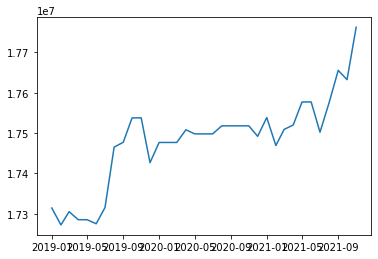

In [0]:
plt.plot(time_series)

In [0]:
model = ExponentialSmoothing(endog = time_series.tancagem_etanol.astype(float),
                             trend = "add",
                             seasonal = "add",
                             seasonal_periods = 12).fit()
predictions = model.forecast(steps = 12)
predictions

/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
Out[66]: 2021-12-01    1.766352e+07
2022-01-01    1.760831e+07
2022-02-01    1.753132e+07
2022-03-01    1.755615e+07
2022-04-01    1.755860e+07
2022-05-01    1.756914e+07
2022-06-01    1.756101e+07
2022-07-01    1.757444e+07
2022-08-01    1.771790e+07
2022-09-01    1.778443e+07
2022-10-01    1.782719e+07
2022-11-01    1.786783e+07
Freq: MS, dtype: float64

Out[67]: [<matplotlib.lines.Line2D at 0x7f0b05cd94c0>]

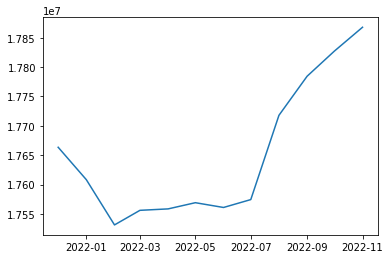

In [0]:
plt.plot(predictions)

Out[68]: <AxesSubplot:xlabel='mes_ano'>

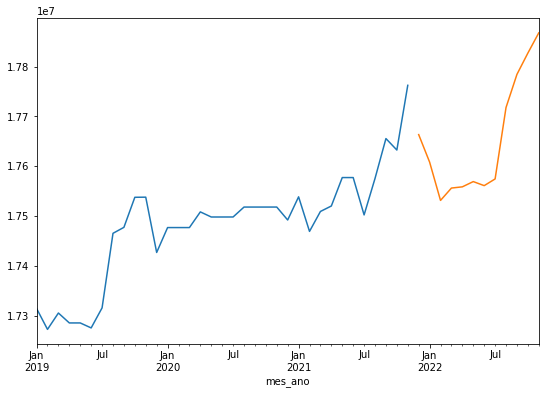

In [0]:
time_series['tancagem_etanol']['2019-01-01':].astype(float).plot(figsize = (9,6))
predictions.plot()

In [0]:
len(time_series)

Out[36]: 35

In [0]:
train = time_series[:25]
train.shape

Out[37]: (25, 1)

In [0]:
train.index.min(), train.index.max()

Out[38]: (Timestamp('2019-01-01 00:00:00'), Timestamp('2021-01-01 00:00:00'))

In [0]:
test = time_series[25:]
test.shape

Out[39]: (10, 1)

In [0]:
test.index.min(), test.index.max()

Out[40]: (Timestamp('2021-02-01 00:00:00'), Timestamp('2021-11-01 00:00:00'))

In [0]:
model2 = ExponentialSmoothing(endog = train.tancagem_etanol.astype(float),
                             trend = "add",
                             seasonal = "add",
                             seasonal_periods = 12).fit()
predictions = pd.DataFrame(model2.forecast(steps = 10), index=test.index)
predictions.columns = ['tancagem_etanol']

/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


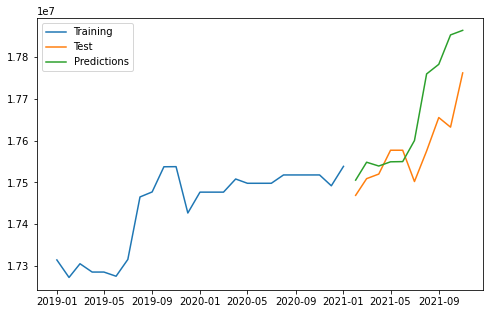

In [0]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(predictions, label = 'Predictions')
plt.legend();